In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fs = 14
matplotlib.rcParams['font.size']=fs
matplotlib.rcParams['lines.markersize']=8
from helper.poly_fit import poly_fit_timescales

In [4]:
from allsn_info import get_iPTF14gqr, get_sn2005ek, get_ptf10iuv, get_sn2010X, get_sn2019bkc, \
                        get_at2019dge, get_sn2018kzr, \
                        get_ptf09dav, get_iPTF16hgs, get_sn2002bj

### Transients color evolution

SN2010X: not enough data in multiple filters

In [5]:
tb0 = get_at2019dge(colorplt = True)['ctb']
tb3 = get_ptf10iuv(colorplt = True)
tb2 = get_sn2005ek(colorplt = True)
tb4 = get_iPTF14gqr(colorplt = True) 
tb5 = get_sn2019bkc(colorplt = True) 
tb6 = get_iPTF16hgs(colorplt = True)
tb7 = get_sn2002bj(colorplt = True)
tb8 = get_sn2010X(colorplt = True)

adopt g band t_max estimated by myself
adopt r band t_max from Drout+13


In [6]:
def adjust_colorfig(ax1, ax2):
    ax1.set_ylim(-0.55, 1.7)
    ax2.set_ylim(-0.55, 1.05)
    
    ax1.set_xlim(-12, 17)
    ax2.set_xlim(-7.5, 30)
    
    ax1.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax2.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax1.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    
    ax2.tick_params(which = 'major', length = 4, top=True, right=True)
    ax2.tick_params(which = 'minor', length = 2, top=True, right=True)
    ax1.tick_params(which = 'major', length = 4, top=True, right=True)
    ax1.tick_params(which = 'minor', length = 2, top=True, right=True)
    
    ax1.set_xlabel("Rest-frame days since $r$-band max", fontsize=fs)
    ax2.set_xlabel("Rest-frame days since $r$-band max", fontsize=fs)
    ax1.set_ylabel("$g-r$ or $B-R$ (mag)", fontsize=fs)
    ax2.set_ylabel("$r-i$ or $R-I$ (mag)", fontsize=fs)

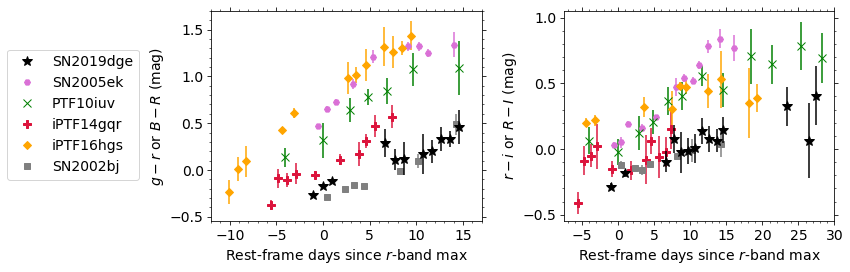

In [7]:
    ms = 8

    xnum = 12
    ynum = 4
    plt.figure(figsize=(xnum, ynum))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    ixg0 = tb0["cname"].values=="gmr"
    ixr0 = tb0["cname"].values=="rmi"
    color = "k"
    ax1.errorbar(tb0["tmax_rf"].values[ixg0], tb0['c'].values[ixg0], tb0['ec'].values[ixg0], fmt='*', color = color, markersize = ms+2, zorder=5)
    ax2.errorbar(tb0["tmax_rf"].values[ixr0], tb0['c'].values[ixr0], tb0['ec'].values[ixr0], fmt='*', color = color, markersize = ms+2, zorder=5)
    ax1.plot(-100,0, '*', color = color, markersize = ms+2, label = "SN2019dge")
    
    ixg2 = tb2["cname"].values=="BmR"
    ixr2 = tb2["cname"].values=="RmI"
    color = "orchid"
    ax1.errorbar(tb2["tmax_rf"].values[ixg2], tb2['c'].values[ixg2], tb2['ec'].values[ixg2], fmt='H', color = color, markersize = ms-2)
    ax2.errorbar(tb2["tmax_rf"].values[ixr2], tb2['c'].values[ixr2], tb2['ec'].values[ixr2], fmt='H', color = color, markersize = ms-2)
    ax1.plot(-100,0, 'H', color = color, markersize = ms-2, label = "SN2005ek")
    
    
    ixg3 = tb3["cname"].values=="gmr"
    ixr3 = tb3["cname"].values=="rmi"
    color = "g"
    ax1.errorbar(tb3["tmax_rf"].values[ixg3], tb3['c'].values[ixg3], tb3['ec'].values[ixg3], fmt='x', color = color, markersize = ms)
    ax2.errorbar(tb3["tmax_rf"].values[ixr3], tb3['c'].values[ixr3], tb3['ec'].values[ixr3], fmt='x', color = color, markersize = ms)
    ax1.plot(-100,0, 'x', color = color, markersize = ms, label = "PTF10iuv")
    
    
    ixg4 = tb4["cname"].values=="gmr"
    ixr4 = tb4["cname"].values=="rmi"
    color = "crimson"
    off4g = 0
    off4r = 0
    ax1.errorbar(tb4["tmax_rf"].values[ixg4], tb4['c'].values[ixg4]-off4g, tb4['ec'].values[ixg4], fmt='P', color = color, markersize = ms)
    ax2.errorbar(tb4["tmax_rf"].values[ixr4], tb4['c'].values[ixr4]-off4r, tb4['ec'].values[ixr4], fmt='P', color = color, markersize = ms)
    ax1.plot(-100,0, 'P', color = color, markersize = ms, label = "iPTF14gqr")
    
    """
    ixg5 = tb5["cname"].values=="gmr"
    ixr5 = tb5["cname"].values=="rmi"
    color = "tan"
    ax1.plot(tb5["tmax_rf"].values[ixg5], tb5['c'].values[ixg5], '*', color = color, markersize = ms)
    ax2.plot(tb5["tmax_rf"].values[ixr5], tb5['c'].values[ixr5], '*', color = color, markersize = ms)
    ax1.plot(-100,0, '*', color = color, markersize = ms, label = "SN2019bkc")
    """
    
    ixg6 = tb6["cname"].values=="gmr"
    ixr6 = tb6["cname"].values=="rmi"
    color = "orange"
    ax1.errorbar(tb6["tmax_rf"].values[ixg6], tb6['c'].values[ixg6], tb6['ec'].values[ixg6], fmt='D', color = color, markersize = ms-2)
    ax2.errorbar(tb6["tmax_rf"].values[ixr6], tb6['c'].values[ixr6], tb6['ec'].values[ixr6], fmt='D', color = color, markersize = ms-2)
    ax1.plot(-100,0, 'D', color = color, markersize = ms-2, label = "iPTF16hgs")
    
    ixg7 = tb7["cname"].values=="BmR"
    ixr7 = tb7["cname"].values=="RmI"
    color = "grey"
    ax1.errorbar(tb7["tmax_rf"].values[ixg7], tb7['c'].values[ixg7], tb7['ec'].values[ixg7], fmt='s', color = color, markersize = ms-2)
    ax2.errorbar(tb7["tmax_rf"].values[ixr7], tb7['c'].values[ixr7], tb7['ec'].values[ixr7], fmt='s', color = color, markersize = ms-2)
    ax1.plot(-100,0, 's', color = color, markersize = ms-2, label = "SN2002bj")
    """
    ixg8 = tb8["cname"].values=="gmr"
    ixr8 = tb8["cname"].values=="rmi"
    color = "b"
    ax1.errorbar(tb8["tmax_rf"].values[ixg8], tb8['c'].values[ixg8], tb8['ec'].values[ixg8], fmt='3', color = color, markersize = ms)
    ax2.errorbar(tb8["tmax_rf"].values[ixr8], tb8['c'].values[ixr8], tb8['ec'].values[ixr8], fmt='3', color = color, markersize = ms)
    ax1.plot(-100,0, '3', color = color, markersize = ms, label = "SN2010X")
    """
    adjust_colorfig(ax1, ax2)
    plt.tight_layout(rect = [0.16, 0, 1, 1]) # (left, bottom, right, top)
    ax1.legend(loc='upper left', ncol=1, frameon = True, bbox_to_anchor=(-0.78, 0.85), fontsize=fs)
    
    plt.savefig("../paper/figures/compare_color.pdf")

In [9]:
5000 * (1+0.063)

5315.0